# [課題] Mental Health in Tech Survey

URL：  https://www.kaggle.com/osmi/mental-health-in-tech-survey

<div style="text-align: right;">
作成者: 藤原 涼
</div>


# 目次

- <a href="#1.-データセットの確認">1. データセットの確認</a>
   - 1.1 各項目の意味を確認
   - 1.2 目的変数について
   - 1.3 データの内容を確認
- <a href="#2.-欠損値の確認">2. 欠損値の確認</a>
   - 2.1 欠損値「state」の確認
   - 2.2 欠損値「self_employed」の確認
   - 2.3 欠損値「work_interfere」の確認
   - 2.4 欠損値「comment」の確認
   - 2.5 欠損値の対応まとめ
- <a href="#3.-名寄せ、外れ値の対応">3. 名寄せ、外れ値の対応</a>
   - 3.1 Ageの外れ値の除外
   - 3.2 Gender の名寄せ
   - 3.3 名寄せ・外れ値の対応まとめ
- <a href="#4.-目的変数と説明変数の関係">4. 目的変数と説明変数の関係</a>
   - 4.1 treatment と Age
   - 4.2 treatment と Country
   - 4.3 treatment と state
   - 4.4 treatment と その他の説明変数
   - 4.5 関係性のまとめ
- <a href="#5.-アルゴリズムの検討">5. アルゴリズムの検討</a>
   - 5.1 データの前処理
   - 5.2 共通処理の定義
- <a href="#6.-重回帰分析">6. 重回帰分析</a>
- <a href="#7.-SVM(SVC)">7. SVM(SVC)</a>
   - 7.1 GridSearchによる最適なパラメータの検討
   - 7.2 交差検証と評価
- <a href="#8.-決定木(DecisionTreeClassifier)">8. 決定木(DecisionTreeClassifier)</a>
   - 8.1 GridSearchによる最適なパラメータの検討
   - 8.2 交差検証と評価
- <a href="#9.-ランダムフォレスト(RandomForestClassifier)">9. ランダムフォレスト(RandomForestClassifier)</a>
   - 9.1 GridSearchによる最適なパラメータの検討
   - 9.2 交差検証と評価
- <a href="#10.-アダブースト(AdaBoostClassifier)">10. アダブースト(AdaBoostClassifier)</a>
   - 10.1 GridSearchによる最適なパラメータの検討
   - 10.2 交差検証と評価
- <a href="#11.-TensorFlow+keras">11. TensorFlow+keras</a>
   - 11.1 パラメータの設定
   - 11.2 実行
   - 11.3 評価
- <a href="#12.-まとめ">12. まとめ</a>


# 1. データセットの確認

## 1.1 各項目の意味を確認
 
参考)
    https://www.kaggle.com/osmi/mental-health-in-tech-survey

* Content
    This dataset contains the following data:

| カラム名 | 英語 | 日本語 |
|:-|:-|:-|
| Timestamp | | 時間 |
| Age | | 年齢 |
| Gender | | 性別 |
| Country | | 国 |
| state | If you live in the United States, which state or territory do you live in? |  アメリカに住んでいる場合のどの州や地域に住んでいるのか |
| self_employed | Are you self-employed? | 自営業かどうか |
| family_history | Do you have a family history of mental illness? |  家族の中で精神病になったことがあるかどうか |
| treatment | Have you sought treatment for a mental health condition? | 精神病の治療を受けたことがあるか(目的変数)  |
| work_interfere | If you have a mental health condition, do you feel that it interferes with your work? |  精神病を持っている場合、仕事の妨害になると感じるか |
| no_employees | How many employees does your company or organization have? | 会社組織の従業員の数 |
| remote_work | Do you work remotely (outside of an office) at least 50% of the time? | 少なくとも50%はリモートやオフィス外で働いているか |
| tech_company | Is your employer primarily a tech company/organization? | 雇用主が、Tech Company/Organizationかどうか |
| benefits | Does your employer provide mental health benefits? | 雇用主が、精神保険給付を提供しているか |
| care_options | Do you know the options for mental health care your employer provides? | 雇用主が提供する精神保健医療の選択肢を知っていますか？ |
| wellness_program | Has your employer ever discussed mental health as part of an employee wellness program? |  あなたの雇用主は従業員の健康プログラムの一環としてメンタルヘルスについて議論しましたか？ |
| seek_help | Does your employer provide resources to learn more about mental health issues and how to seek help? | あなたの雇用主は、メンタルヘルスの問題や助けを求める方法についての詳細を学ぶためのリソースを提供していますか？ |
| anonymity | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? | メンタルヘルスや薬物乱用の治療リソースを利用することを選択した場合は、匿名性が保護されていますか？ |
| leave | How easy is it for you to take medical leave for a mental health condition? | あなたが精神的健康状態のために休暇をとることはいかがですか？ |
| mental_health_consequence | Do you think that discussing a mental health issue with your employer would have negative consequences? | あなたの雇用主との精神保健問題について話し合うことは悪影響を及ぼすと思いますか？ |
| phys_health_consequence | Do you think that discussing a physical health issue with your employer would have negative consequences? | あなたの雇用主との健康上の問題について議論することは、否定的な結果をもたらすと思いますか？ |
| coworkers | Would you be willing to discuss a mental health issue with your coworkers? | あなたの同僚と精神衛生上の問題について話し合いたいですか？|
| supervisor | Would you be willing to discuss a mental health issue with your direct supervisor(s)? | あなたはあなたの直属の上司と精神衛生上の問題について話し合いたいですか？ |
| mental_health_interview | Would you bring up a mental health issue with a potential employer in an interview? | インタビューで潜在的な雇用主との精神衛生問題を提起しますか？ |
| phys_health_interview | Would you bring up a physical health issue with a potential employer in an interview? |  インタビューで潜在的な雇用主との身体的健康問題を提起しますか？ |
| mental_vs_physical | Do you feel that your employer takes mental health as seriously as physical health? | あなたの雇用主は精神的健康を肉体的健康と同じくらい重視していると感じますか？ |
| obs_consequence | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? |  あなたの職場に精神的健康状態の同僚のために否定的な結果を聞いたり、観察しましたか？ |
| comments | Any additional notes or comments | 追加のメモやコメント |
 
  
## 1.2 目的変数について

- 精神的健康状態の治療を受けたことがあるかどうかのフラグである、「<span style="font-size:120%; color:red;">treatment</span>」が目的変数


## 1.3 データの内容を確認

In [3]:
# 必要なライブラリを読み込む

%matplotlib inline 
import numpy as np
import pandas as pd
from IPython.display import display
from dateutil.parser import parse
import matplotlib.pyplot as plt

# Get a quick overview of all of the variables using pandas_profiling
## 参考: https://www.kaggle.com/lizpund/analysis-of-mental-health-in-tech-survey-2014
import pandas_profiling


import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

In [4]:
# データの読み込み
df_data = pd.read_csv("../1_data/survey.csv")

In [5]:
# Pandas Profilingの実行
pandas_profiling.ProfileReport(df_data)

Number of variables,27
Number of observations,1259
Total Missing (%),5.6%
Total size in memory,265.6 KiB
Average record size in memory,216.1 B
Numeric,1
Categorical,26
Date,0
Text (Unique),0
Rejected,0
Distinct count,53


memo: 上記内容よりわかること



- 欠損値について
   - state（州）の情報の40.9%が欠損値
      - state has 515 / 40.9% missing values Missing
      - 上記より、60%は、アメリカ合衆国のデータであることがわかる
   - self_employed(自営業かどうか）の情報の1.4%が欠損値
      - self_employed has 18 / 1.4% missing values Missing
   - work_interfere(精神病が仕事の妨害になるのか）の情報の21.0%が欠損値
      - work_interfere has 264 / 21.0% missing values 
   - comments(コメント)の87.0%が欠損値
      - comments has 1095 / 87.0% missing values Missing

- Age
   - 平均や最大・最小値より異常値が紛れ込んでいる
      - Mean	79428000
      - Minimum	-1726
      - Maximum	99999999999
- Gender
   - 性別を表す値が、49種類も存在しているため、名寄の必要がありそう
      - Distinct count	49
      - Unique (%)	3.9%

# 2. 欠損値の確認

先程の結果より、4つの項目が欠損値となっていた。

In [6]:
# 各カラム毎に欠損値の数の合計を計算する
df_missing = pd.DataFrame(df_data.isnull().sum(), columns=["欠損データ数"])

# 全データに締める欠損データの数を割合で確認するためのデータを準備する
total_count = df_data.shape[0] # 全データ数を取得する
df_missing_rate = df_missing[(df_missing["欠損データ数"] > 0)] /total_count*100 # 欠損値の数を全データ数で割ることで割合を求める
df_missing_rate = df_missing_rate.rename(columns={'欠損データ数': '欠損データの割合(%)'})


print("欠損データの割合を表示。（※ 全体のデータ件数は、", total_count, "件）")
pd.concat([df_missing[(df_missing["欠損データ数"] > 0)], df_missing_rate], axis=1)

欠損データの割合を表示。（※ 全体のデータ件数は、 1259 件）


,欠損データ数,欠損データの割合(%)
state,515,40.905481
self_employed,18,1.429706
work_interfere,264,20.969023
comments,1095,86.973789


## 2.1 欠損値「state」の確認

stateはアメリカ合衆国に住んでいる場合州を指定するために用いられる。<br>
そのため、アメリカに住んでいない人のデータは、欠損値となっているため、<br>
欠損値をno_dataという文字列に置き換えておく。<br>

In [7]:
print("アメリカに住んでいる人のデータ")
display(df_data[["Country", "state"]][df_data["Country"] == "United States"].head())
print("アメリカ以外に住んでいる人のデータ")
display(df_data[["Country", "state"]][df_data["Country"] != "United States"].head())

# アメリカ以外に住んでいる人が欠損値となることがわかったので、"no_data"という文字列で置換するとともに、
df_data = df_data.fillna({"state":"no_data"})
print("欠損値をno_dataの文字列に置き換え")
df_data[["Country", "state"]].head()

アメリカに住んでいる人のデータ


,Country,state
0,United States,IL
1,United States,IN
4,United States,TX
5,United States,TN
6,United States,MI


アメリカ以外に住んでいる人のデータ


,Country,state
2,Canada,NaN
3,United Kingdom,NaN
7,Canada,NaN
9,Canada,NaN
11,Bulgaria,NaN


欠損値をno_dataの文字列に置き換え


,Country,state
0,United States,IL
1,United States,IN
2,Canada,no_data
3,United Kingdom,no_data
4,United States,TX


## 2.2 欠損値「self_employed」の確認
self_employedは、自営業かどうかの判定のフラグに用いられている。<br>
なお欠損値は、18件と全体の1.4%程度である。

In [8]:
print("欠損値の場合の、精神疾患病の有無を確認すると、9件ずつであった。")
self_employed_null = df_data[df_data["self_employed"].isnull()]

# nullのデータが無い場合、エラーとなってしまうので念のためチェックを入れておく
if self_employed_null.empty == False:
    self_employed_null = self_employed_null.fillna({"self_employed":"no_data"})
    df_no_employees = pd.crosstab(index=self_employed_null["treatment"], columns=self_employed_null["self_employed"], margins=True)
    display(df_no_employees)

# 自営業と従業員規模に焦点をあててクロス集計を実施
print("自営業と従業員の規模の関係性を確認し、欠損値を従業員の規模で補えるのかを確認してみる。")
df_no_employees = pd.crosstab(index=df_data["self_employed"], columns=df_data["no_employees"], margins=True)
display(df_no_employees)

欠損値の場合の、精神疾患病の有無を確認すると、9件ずつであった。


self_employed,no_data,All
treatment,,
No,9,9
Yes,9,9
All,18,18


自営業と従業員の規模の関係性を確認し、欠損値を従業員の規模で補えるのかを確認してみる。


no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,All
self_employed,,,,,,,
No,62,168,276,59,253,277,1095
Yes,98,5,8,0,31,4,146
All,160,173,284,59,284,281,1241


上記より、self_employedが欠損値の場合でも、目的変数の割合は半々であり、
また従業員の規模から自営業かどうかを保管できないか関係性を見てみたが、判断することは出来ないので、
未記入を「no_data」という文字列で保管しておく。

In [9]:
# self_employedの未記入データを「no-data」という文字列で補完する
df_data = df_data.fillna({"self_employed":"no_data"})

## 2.3 欠損値「work_interfere」の確認

精神病が仕事の妨害になると感じるかという情報である。<br>
264件と約21.0%の欠損値であり、精神疾患病が無い人の方が未回答である割合が多い。

In [10]:
print("欠損値データの精神疾患病の有無を確認すると、Noが260件と大半を占めていた。")
work_interfere_null = df_data[df_data["work_interfere"].isnull()]

# nullのデータが無い場合、エラーとなってしまうので念のためチェックを入れておく
if work_interfere_null.empty == False:
    work_interfere_null = work_interfere_null.fillna({"work_interfere":"no_data"})
    df_work_interfere = pd.crosstab(index=work_interfere_null["treatment"], columns=work_interfere_null["work_interfere"], margins=True)
    display(df_work_interfere)

欠損値データの精神疾患病の有無を確認すると、Noが260件と大半を占めていた。


work_interfere,no_data,All
treatment,,
No,260,260
Yes,4,4
All,264,264


In [11]:
# 未記入の情報も精神疾患病の有無に大きく影響しそうな感じはするので、
# work_interfere の未記入データを「no-data」という文字列で補完する
df_data = df_data.fillna({"work_interfere":"no_data"})

## 2.4 欠損値「comment」の確認

コメントに関しては、欠損値ではなく未記入となりため、欠損値には空文字を登録しておくことにする。

TODO: コメントのデータは、どのように扱えばよいのだろうか

In [12]:
df_data = df_data.fillna({"comments":""})

## 2.5 欠損値の対応まとめ

- state: 約41%
   - 州を入力する項目であるため、アメリカに住んでいない場合は欠損値となる
   - 欠損値の場合は、「no_data」という文字列で補完した
- self_employed: 約1%
   - 自営業かどうかを示す値
   - 欠損値の場合は、「no_data」という文字列で補完した
- work_interfere: 約21%
   - 精神病が仕事の妨害になると感じるかという情報
   - 264件の欠損値のうち、260件が精神病でない人の回答となっていた。
      - 何か傾向がありそうな感じはするが...
   - 一旦欠損値の場合は、「no_data」という文字列で補完した
- comments: 約87%
   - 未記入のデータがほとんどである
   - 欠損値の場合は、空文字で補完した

# 3. 名寄せ、外れ値の確認

改めて、各カラムについて、ユニークなデータ件数や値を確認する.

In [13]:
#df_data["Age"].value_counts().sort_index(0)
print("各カラムのデータをユニークな値で確認する")
for column in df_data.columns.values:
    if column in ["Timestamp", "comments"]:
        continue
    print(column, ":", len(set(df_data[column])), "件")
    print(set(df_data[column]))
    print()


各カラムのデータをユニークな値で確認する
Age : 53 件
{5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, -1726, 72, 329, -29, -1, 99999999999}

Gender : 49 件
{'msle', 'Agender', 'Cis Male', 'Female ', 'woman', 'F', 'queer', 'Make', 'Male', 'Trans woman', 'femail', 'Cis Female', 'Mail', 'Femake', 'Female (trans)', 'ostensibly male, unsure what that really means', 'Guy (-ish) ^_^', 'Man', 'male', 'Enby', 'non-binary', 'Male ', 'maile', 'm', 'M', 'something kinda male?', 'cis male', 'All', 'Androgyne', 'Cis Man', 'female', 'Woman', 'Female', 'Malr', 'p', 'cis-female/femme', 'Genderqueer', 'Trans-female', 'A little about you', 'Male (CIS)', 'f', 'queer/she/they', 'Female (cis)', 'Nah', 'Mal', 'Neuter', 'Male-ish', 'male leaning androgynous', 'fluid'}

Country : 48 件
{'Slovenia', 'Philippines', 'Costa Rica', 'Finland', 'Switzerland', 'Singapore', 'Belgium', 'Romania', 'Canada', 

上記より、「Age」と「Gender」について対応が必要。

- Age
   - 99999999999 や -1726 などの変なデータがあることが確認できるので外れ値として除外する必要がありそう
- Gender
   - 性別についても様々な形式で入力されているので名寄せが必要

その他の変数については問題ない認識

## 3.1 Ageの外れ値の除外

年齢の入力状況を確認し、「0歳以下」と「100歳以上」のデータについては外れ値として該当の行を削除する

Age,-1726,-29,-1,5,8,11,18,19,20,21,...,57,58,60,61,62,65,72,329,99999999999,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0,1,0,1,0,1,4,5,4,8,...,1,0,1,0,1,1,0,0,0,622
Yes,1,0,1,0,1,0,3,4,2,8,...,2,1,1,1,0,0,1,1,1,637
All,1,1,1,1,1,1,7,9,6,16,...,3,1,2,1,1,1,1,1,1,1259


外れ値削除後の年齢データの分布の確認


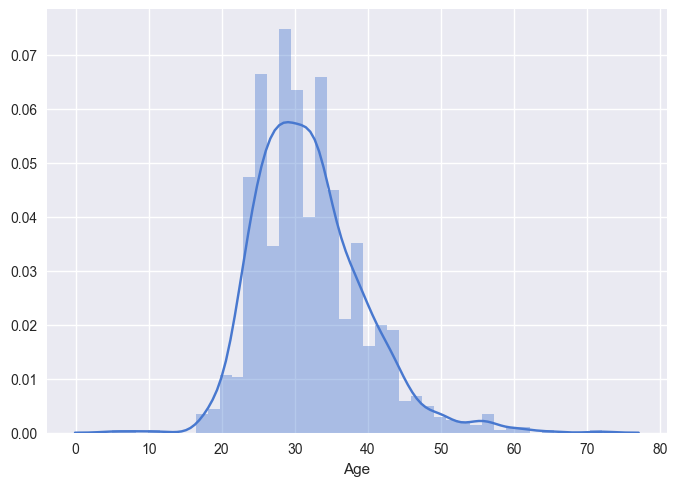

In [14]:
df_c = pd.crosstab(index=df_data["treatment"], columns=df_data["Age"], margins=True)
display(df_c) 

# 外れ値を削除
df_data = df_data[((df_data["Age"]  >= 0)  & (df_data["Age"]  < 100))]

# 外れ値を削除後のデータの確認
print("外れ値削除後の年齢データの分布の確認")
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_data["Age"]);

## 3.2 Gender の名寄せ

性別については、表記が整っておらず、またトランスジェンダーなどもデータとして含まれているため、
単純に「男性」「女性」で分類するのではなく、下記の5パターンで分類することにする。

- Male (cis)
- Male (trans)
- Female (cis)
- Female (trans)
- Other


- 参考にしたNotebook
   - https://www.kaggle.com/kairosart/machine-learning-for-mental-health
   - https://www.kaggle.com/lizpund/analysis-of-mental-health-in-tech-survey-2014


名寄せ後のデータ件数の確認


Male (cis)        988
Female (cis)      248
Other              14
Female (trans)      4
Name: mapGender, dtype: int64

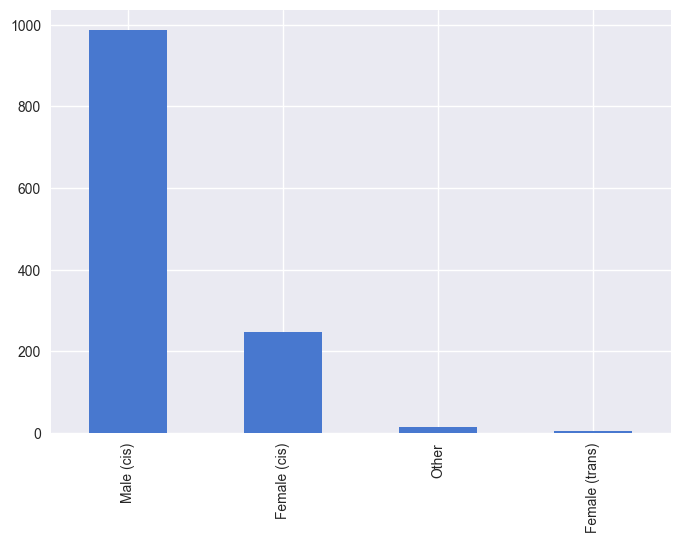

In [15]:
### Genderに登録されている種類を表示する
#df_data['Gender'].value_counts().index.tolist()
#display(df_data['Gender'].value_counts().index)

df_data["mapGender"] = df_data["Gender"].map({
    "Male":"Male (cis)",
    "male":"Male (cis)",
    "M": "Male (cis)",
    "m":"Male (cis)",
    "Make": "Male (cis)",
    "Male ": "Male (cis)",
    "Man": "Male (cis)",
    "Cis Male": "Male (cis)",
    "Mail": "Male (cis)",
    "Malr": "Male (cis)",
    "Mal": "Male (cis)",
    "Cis Man": "Male (cis)",
    "maile": "Male (cis)",
    "cis male": "Male (cis)",
    "Male (CIS)": "Male (cis)",
    "Male-ish": "Male (cis)",
    "msle": "Male (cis)",
    "Female":"Female (cis)",
    "female": "Female (cis)",
    "F": "Female (cis)",
    "f": "Female (cis)",
    "Woman": "Female (cis)",
    "Female ": "Female (cis)",
    "Female (trans)": "Female (trans)",
    "woman": "Female (cis)",
    "Cis Female": "Female (cis)",
    "Trans-female": "Female (trans)",
    "Female (cis)": "Female (cis)",
    "femail": "Female (cis)",
    "Femake" :"Female (cis)",
    "Trans woman": "Female (trans)",
    "queer": "Female (cis)",
    "Genderqueer": "Other",
    "cis-female/femme": "Female (cis)",
    "A little about you": "Other",
    "All": "Other",
    "Guy (-ish) ^_^":"Other",
    "queer/she/they": "Other",
    "Androgyne": "Other",
    "fluid": "Other",
    "male leaning androgynous": "Other",
    "non-binary": "Other",
    "ostensibly male, unsure what that really means": "Other",
    "p": "Other",
    "something kinda male?": "Other",
    "Neuter": "Other",
    "Agender": "Other",
    "Enby": "Other",
    "Nah": "Other",
})

print("名寄せ後のデータ件数の確認")
display(df_data['mapGender'].value_counts())
df_data['mapGender'].value_counts().plot(kind='bar')

## 3.3 名寄せ・外れ値の対応まとめ

- Age
   - 外れ値を除外
   - 0歳 ~ 100歳までのデータを対象とした
- Gender
   - 男性:
      - Male (cis)
      - Male (trans)
   - 女性:
      - Female (cis)
      - Female (trans)
   - その他: Other

# 4. 目的変数と説明変数の関係

ここから目的変数と説明変数の関係性を表すグラフを記載していく

## 4.1 treatment と Age

精神と年齢の関係性


Age,5,8,11,18,19,20,21,22,23,24,...,55,56,57,58,60,61,62,65,72,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,1,0,1,4,5,4,8,10,27,28,...,0,1,1,0,1,0,1,1,0,621
Yes,0,1,0,3,4,2,8,11,24,18,...,3,3,2,1,1,1,0,0,1,633
All,1,1,1,7,9,6,16,21,51,46,...,3,4,3,1,2,1,1,1,1,1254


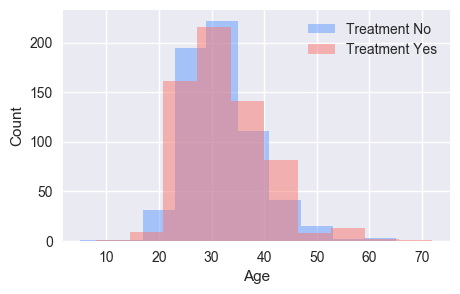

In [16]:
print("精神と年齢の関係性")
df_c = pd.crosstab(index=df_data["treatment"], columns=df_data["Age"], margins=True)
display(df_c) 

# ヒストグラムで年代別の傾向を見てみる
plt.figure(figsize=(5,3))
df_data["Age"][df_data["treatment"] == "No"].hist(color="#5F9BFF", alpha=.5, label=["Treatment No"])     # 薄い青色
df_data["Age"][df_data["treatment"] == "Yes"].hist(color="#F8766D", alpha=.5, label=["Treatment Yes"]) # 薄い赤色
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

30代前後の精神病発症の割合は半々程度であるが、30代後半から40代半ばあたりは、発症の割合が高くなっている。<br>
逆に20代など年齢が若いときは発症の割合が低い傾向が見られる。


性別による年齢別の発症割合がどう違うのかが気になったので念のため見ておく。


男性 の年齢別精神病発症の関係性


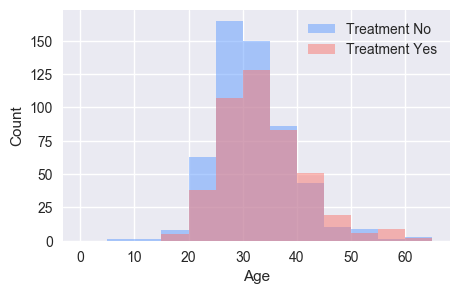

None

女性 の年齢別精神病発症の関係性


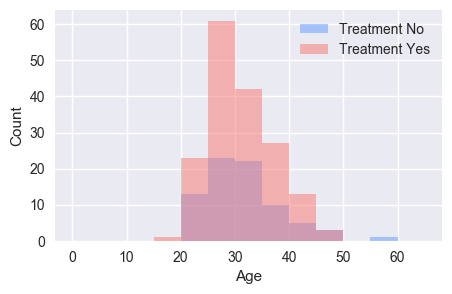

None

In [17]:
'''
df_stdsc = df_data[["treatment", "mapGender", "Age"]].copy()
# 標準化を行うにあたり、int型だと警告エラーが出ていたので、float64型にキャストする
df_stdsc["Age"] = df_stdsc[["Age"]].astype("float64")
# 正則化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_stdsc["normalized"] =mms.fit_transform(df_stdsc[["Age"]].values)
#df_stdsc["normalized"] = (df_stdsc["Age"] - df_stdsc["Age"].min()) / (df_stdsc["Age"].max() - df_stdsc["Age"].min())

#標準化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df_stdsc["standardized"] = stdsc.fit_transform(df_stdsc[["Age"]].values)
#df_stdsc["standardized"] = (df_stdsc["Age"] - df_stdsc["Age"].mean()) / df_stdsc["Age"].std(ddof=0)
'''

# 男性
df_tmp_male    = df_data[["treatment", "mapGender", "Age"]][(df_data["mapGender"] == 'Male (cis)')]
# 女性
df_tmp_female = df_data[["treatment", "mapGender", "Age"]][(df_data["mapGender"] == 'Female (cis)')]



def showGenderHist(data, label):
    print(label, 'の年齢別精神病発症の関係性')
    plt.figure(figsize=(5,3))
    data["Age"][data["treatment"] == "No"].hist(color="#5F9BFF", alpha=.5, label=["Treatment No"], bins=np.arange(0,70, 5))     # 薄い青色
    data["Age"][data["treatment"] == "Yes"].hist(color="#F8766D", alpha=.5, label=["Treatment Yes"], bins=np.arange(0,70, 5)) # 薄い赤色
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.legend()
    display(plt.show())

showGenderHist(df_tmp_male,    '男性')
showGenderHist(df_tmp_female, '女性')

女性の方が20代後半での発症件数の割合が高く、比較的若い段階から発症する可能性が高いと考えられる。


メモ: 

元データより
- 「Male (cis)[男性]: 988件,  Female (cis)[女性]: 248件」と女性のサンプルデータが男性よりもかなり少ない
- 精神病の発症割合も女性の方が高かった
という状況のため、この図での比較がどこまで意味があるのだろうか...

とりあえず、年齢が何か関係ありそうな気がするので、図のように5歳区切りでクラス分けを行ってみる。

mapAge,5,10,15,20,25,30,35,40,45,50,55,60,65,75,All
treatment,,,,,,,,,,,,,,,
No,1,0,1,13,99,193,167,86,38,14,4,3,2,0,621
Yes,0,1,0,9,96,169,172,99,54,16,8,7,1,1,633
All,1,1,1,22,195,362,339,185,92,30,12,10,3,1,1254


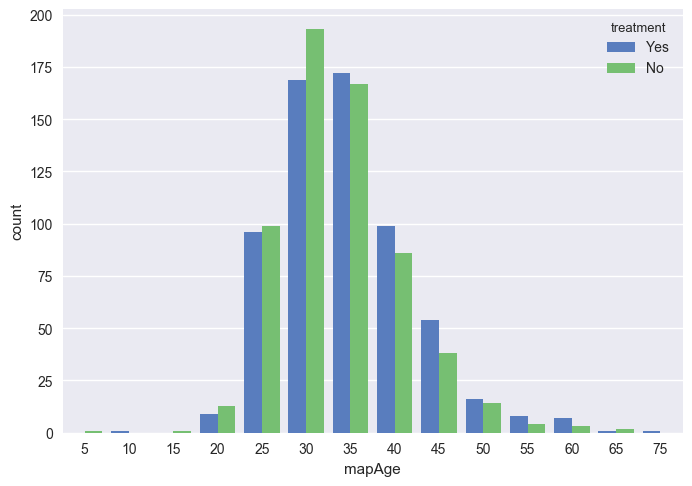

In [18]:
import math

# 10,15,20,25の5歳区切りで分類する
## 20 => 20
## 22 => 25
## 25 => 25
## 26 => 30
## 29 => 30
def mapAge(age):
    if age%10 == 0:
        return age
    elif age%10 > 5:
        return math.ceil(age/10)*10
    return  math.floor(age/10)*10+5

df_data['mapAge'] = df_data['Age'].map(lambda x: mapAge(x))
df_data[["Age", "mapAge"]]

df_c = pd.crosstab(index=df_data["treatment"], columns=df_data["mapAge"], margins=True)
display(df_c) 

sns.countplot(x="mapAge", hue="treatment", hue_order=["Yes", "No"], data=df_data)
plt.show()

## 4.2 treatment と Country

stateの欠損値の情報より、約60%はアメリカ合衆国のデータであることがわかっている。<br>
国別の発症状況をグラフで確認してみる。

アメリカ の精神病の有無


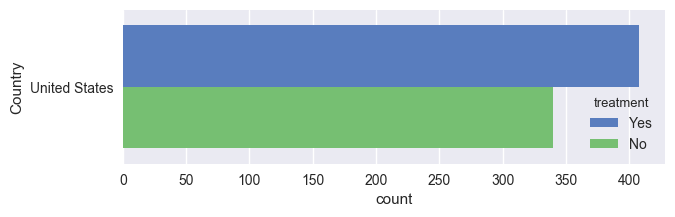

アメリカ以外 の精神病の有無


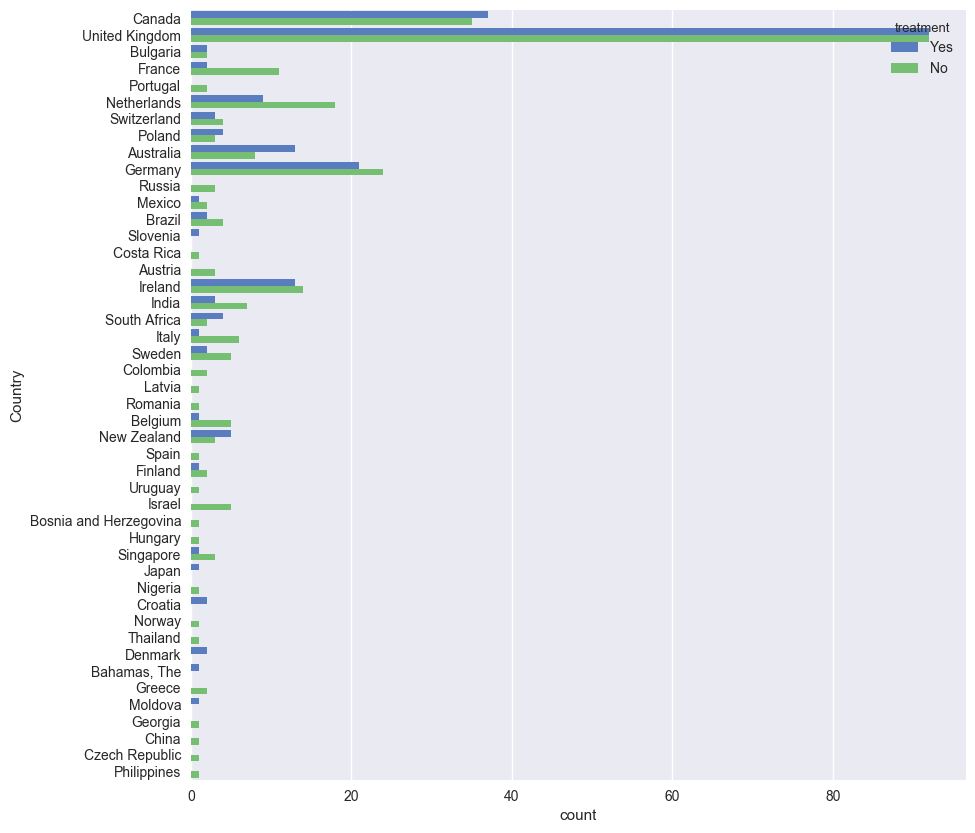

In [19]:
df_data_usa    = df_data[["treatment", "Country"]][(df_data["Country"] == 'United States')]
df_data_other = df_data[["treatment", "Country"]][(df_data["Country"] != 'United States')]

def showCountryHist(data, label):
    print(label, "の精神病の有無")
    sns.countplot(y="Country", hue="treatment", hue_order=["Yes", "No"], data=data)
    plt.show()

plt.figure(figsize=(7, 2))
showCountryHist(df_data_usa, "アメリカ")
plt.figure(figsize=(10, 10))

showCountryHist(df_data_other, "アメリカ以外")

国別で確認しても、精神病の有無はおおよそ半々程度あるが、アメリカの場合、精神病の割合が多い。

- 参考) 精神病の有無の元データ
   - Yes:	637
   - No: 	622





## 4.3 treatment と state

アメリカの回答者の場合州の情報が入っているが、州は46種類存在している。
そのため、下記のNoteBookを参考にアメリカの州を大きく4つの地区に分類し、傾向を確認してみることにする。

- 分類する地区
   - west
   - midwest
   - northeast
   - south

- 参考にしたNoteBookや記事
   - https://www.kaggle.com/lizpund/analysis-of-mental-health-in-tech-survey-2014
   - https://commons.wikimedia.org/w/index.php?curid=10687031

アメリカ地区別の精神病有無の状況


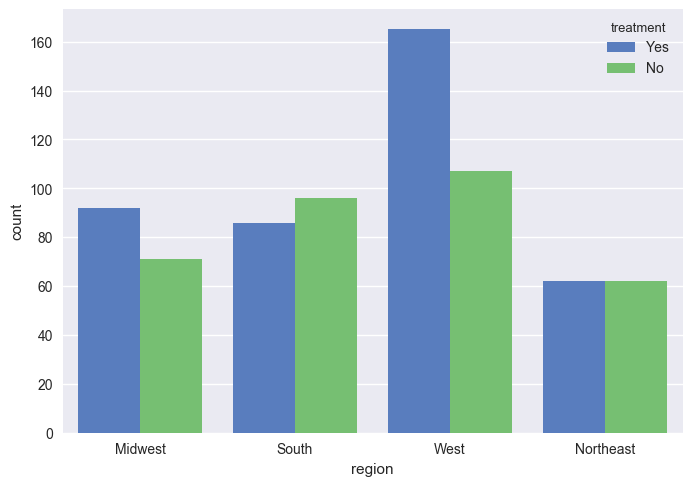

In [20]:
# 上記NoteBookより、州を4つの地区に変換するプログラムはコピー

df_data['region'] = df_data['state']
 
west = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "AZ", "NM", "CO"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "OH", "MI"]
northeast = ["ME",  "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
south = ["MD", "DE", "DC", "WV",  "VA", "NC","SC", "GA", "FL", "KY", "TN", "AL", "MS", "AR", "LA", "OK", "TX"]

df_data['region'] = df_data['region'].apply(lambda x:"West" if x in west else x)
df_data['region'] = df_data['region'].apply(lambda x:"Midwest" if x in midwest else x)
df_data['region'] = df_data['region'].apply(lambda x:"Northeast" if x in northeast else x)
df_data['region'] = df_data['region'].apply(lambda x:"South" if x in south else x)

# アメリカ以外のデータは一旦対象外としておく
df_region = df_data[df_data['region'] != 'no_data']

print("アメリカ地区別の精神病有無の状況")
sns.countplot(x="region", hue="treatment", hue_order=["Yes", "No"], data=df_region)
plt.show()

上記よりWest地区(カリフォルニアやワシントンなど)で、比較的精神病と答えた方が多い。

メモ: 
西海岸はイノベーションの地のイメージが大きいが、なんかあるのかなぁ
ホームレスが多いという記事は見つけたが...

参考) 西海岸でホームレスが急増している主要因
https://shimamyuko.wordpress.com/2017/11/06/%E8%A5%BF%E6%B5%B7%E5%B2%B8%E3%81%A7%E3%83%9B%E3%83%BC%E3%83%A0%E3%83%AC%E3%82%B9%E3%81%8C%E6%80%A5%E5%A2%97%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E4%B8%BB%E8%A6%81%E5%9B%A0/


## 4.4 treatment と その他の説明変数

*******************************
self_employed


self_employed,No,Yes,no_data,All
treatment,,,,
No,544,68,9,621
Yes,548,76,9,633
All,1092,144,18,1254


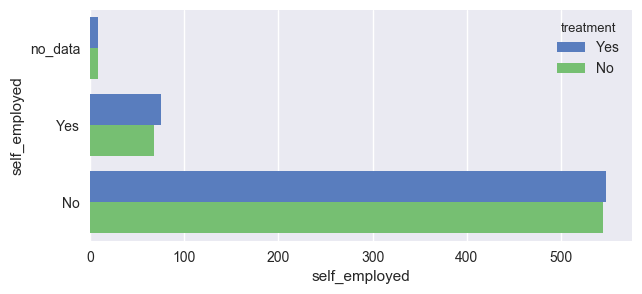


*******************************
family_history


family_history,No,Yes,All
treatment,,,
No,494,127,621
Yes,270,363,633
All,764,490,1254


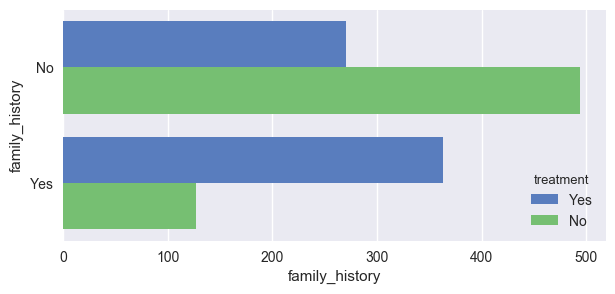


*******************************
work_interfere


work_interfere,Never,Often,Rarely,Sometimes,no_data,All
treatment,,,,,,
No,183,21,51,107,259,621
Yes,30,120,122,357,4,633
All,213,141,173,464,263,1254


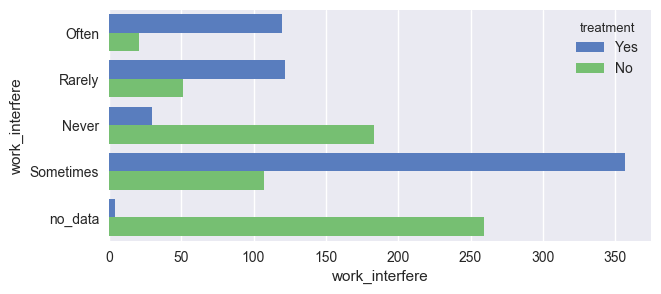


*******************************
no_employees


no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,All
treatment,,,,,,,
No,71,81,139,33,162,135,621
Yes,89,95,149,27,127,146,633
All,160,176,288,60,289,281,1254


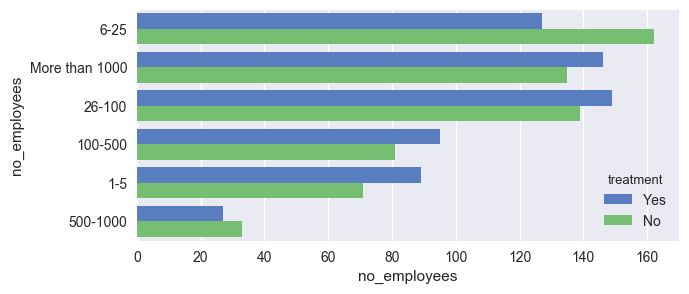


*******************************
remote_work


remote_work,No,Yes,All
treatment,,,
No,444,177,621
Yes,437,196,633
All,881,373,1254


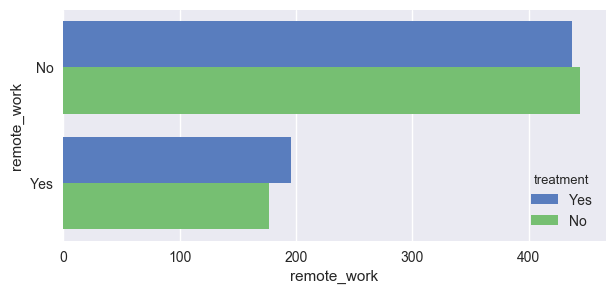


*******************************
tech_company


tech_company,No,Yes,All
treatment,,,
No,104,517,621
Yes,122,511,633
All,226,1028,1254


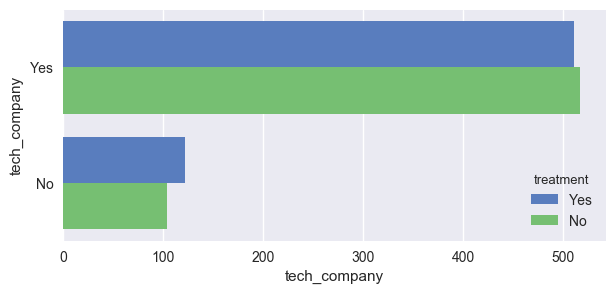


*******************************
benefits


benefits,Don't know,No,Yes,All
treatment,,,,
No,257,193,171,621
Yes,151,179,303,633
All,408,372,474,1254


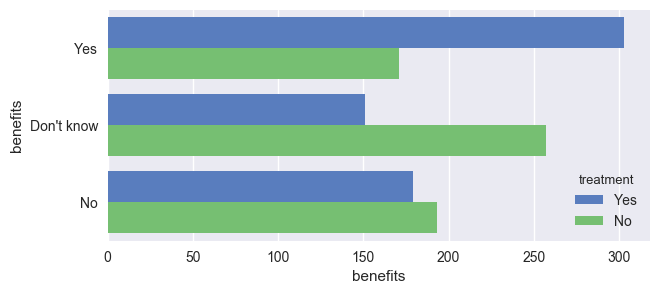


*******************************
care_options


care_options,No,Not sure,Yes,All
treatment,,,,
No,293,191,137,621
Yes,206,123,304,633
All,499,314,441,1254


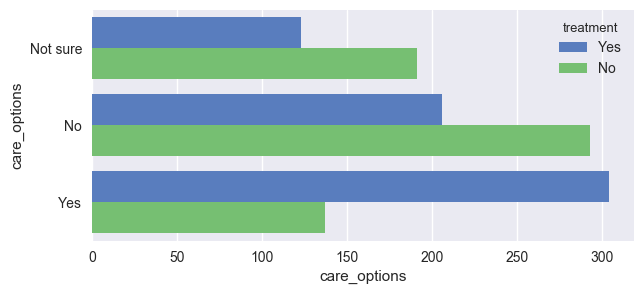


*******************************
wellness_program


wellness_program,Don't know,No,Yes,All
treatment,,,,
No,106,422,93,621
Yes,81,417,135,633
All,187,839,228,1254


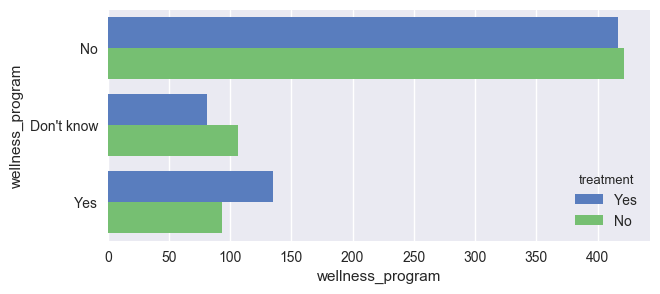


*******************************
seek_help


seek_help,Don't know,No,Yes,All
treatment,,,,
No,197,323,101,621
Yes,166,320,147,633
All,363,643,248,1254


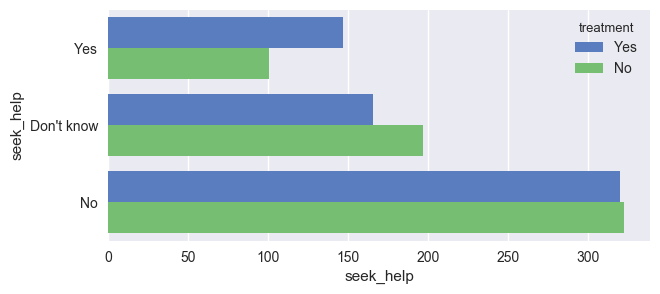


*******************************
anonymity


anonymity,Don't know,No,Yes,All
treatment,,,,
No,447,27,147,621
Yes,369,37,227,633
All,816,64,374,1254


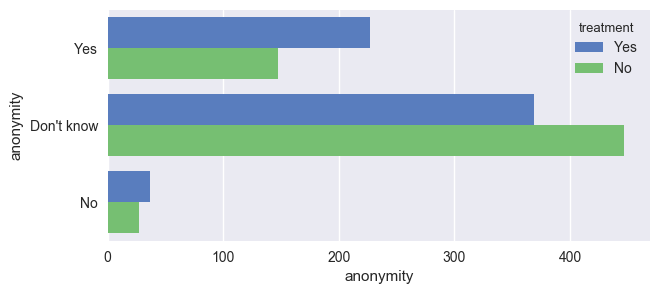


*******************************
leave


leave,Don't know,Somewhat difficult,Somewhat easy,Very difficult,Very easy,All
treatment,,,,,,
No,308,44,135,31,103,621
Yes,253,81,131,66,102,633
All,561,125,266,97,205,1254


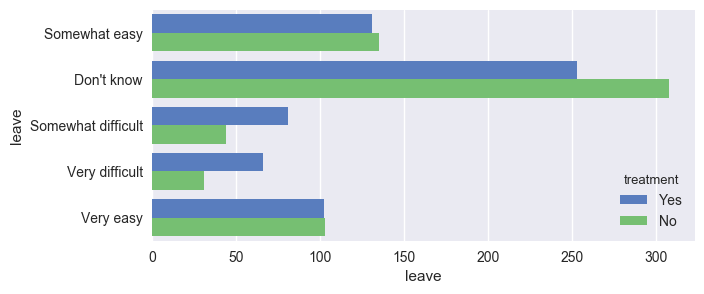


*******************************
mental_health_consequence


mental_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,224,279,118,621
Yes,252,210,171,633
All,476,489,289,1254


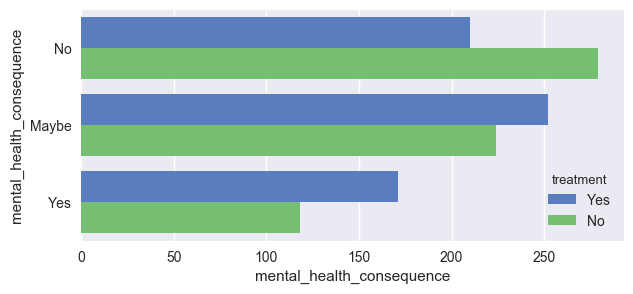


*******************************
phys_health_consequence


phys_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,127,469,25,621
Yes,146,453,34,633
All,273,922,59,1254


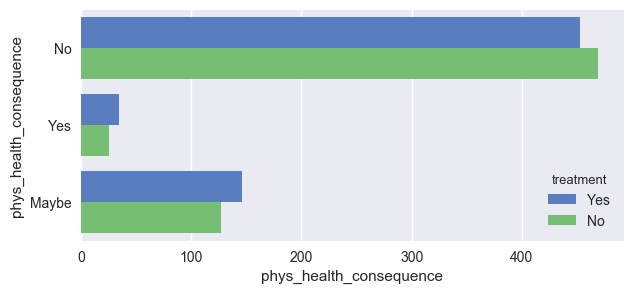


*******************************
coworkers


coworkers,No,Some of them,Yes,All
treatment,,,,
No,141,383,97,621
Yes,117,389,127,633
All,258,772,224,1254


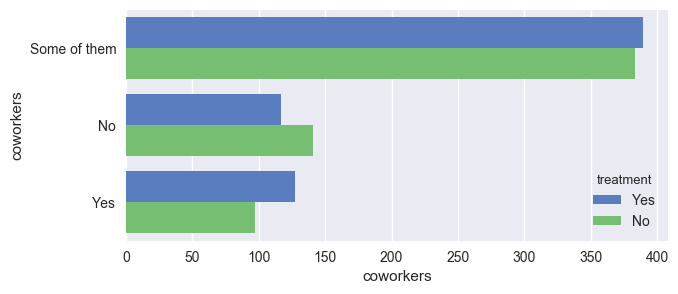


*******************************
supervisor


supervisor,No,Some of them,Yes,All
treatment,,,,
No,186,170,265,621
Yes,204,180,249,633
All,390,350,514,1254


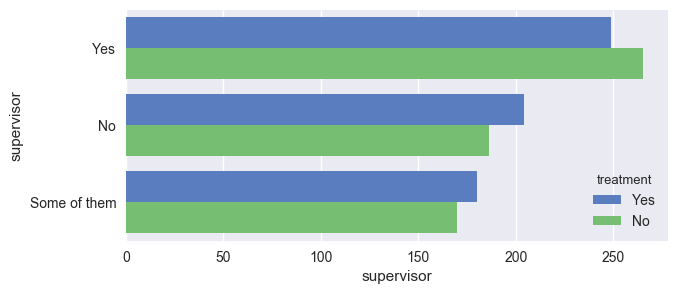


*******************************
mental_health_interview


mental_health_interview,Maybe,No,Yes,All
treatment,,,,
No,125,478,18,621
Yes,82,527,24,633
All,207,1005,42,1254


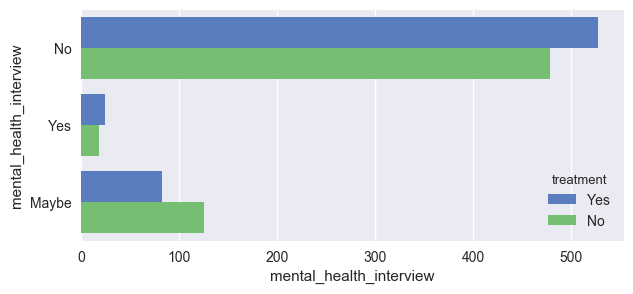


*******************************
phys_health_interview


phys_health_interview,Maybe,No,Yes,All
treatment,,,,
No,290,240,91,621
Yes,266,257,110,633
All,556,497,201,1254


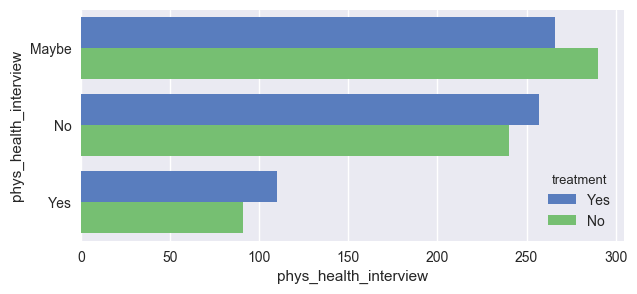


*******************************
mental_vs_physical


mental_vs_physical,Don't know,No,Yes,All
treatment,,,,
No,315,138,168,621
Yes,259,200,174,633
All,574,338,342,1254


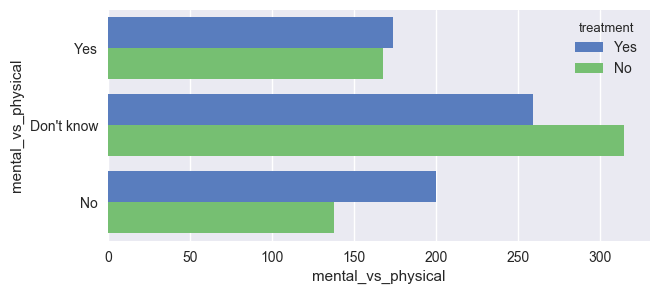


*******************************
obs_consequence


obs_consequence,No,Yes,All
treatment,,,
No,565,56,621
Yes,507,126,633
All,1072,182,1254


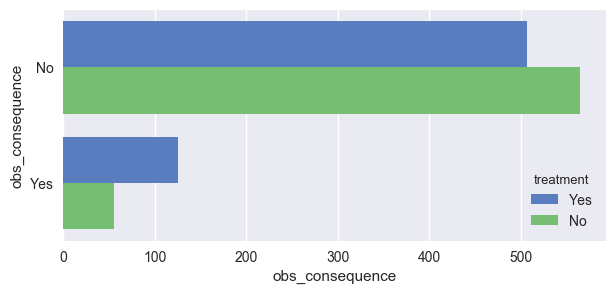


*******************************
mapAge


mapAge,5,10,15,20,25,30,35,40,45,50,55,60,65,75,All
treatment,,,,,,,,,,,,,,,
No,1,0,1,13,99,193,167,86,38,14,4,3,2,0,621
Yes,0,1,0,9,96,169,172,99,54,16,8,7,1,1,633
All,1,1,1,22,195,362,339,185,92,30,12,10,3,1,1254


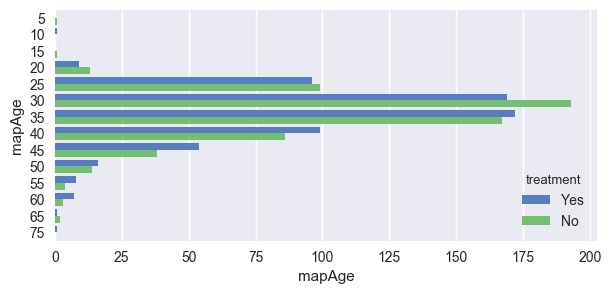

In [21]:
for column in df_data.columns:
    if column in ["Timestamp", "treatment", "Gender", "comments"]:
        continue

    # 上記にて違う見せ方が良さそう
    if column in ["Age", "Country", "state", "region", "mapGender"]:
        continue

    print("*******************************")
    print(column)
    df_c = pd.crosstab(index=df_data["treatment"], columns=df_data[column], margins=True)
    display(df_c) 

    plt.figure(figsize=(7,3))
    sns.countplot(y=column, hue="treatment", hue_order=["Yes", "No"], data=df_data)
    plt.xlabel(column)
    plt.show()

    print()

## 関係性のまとめ


上記比較より下記の項目が精神病と有無に影響がありそうと考える。

- 結構関係がありそう
   - family_history
   - work_interfere
   - benefits
   - care_options
- 少しだけ関係がありそう
   - Gender
   - Age
   - leave
   - mental_health_consequence
   - mental_vs_physical
   - obs_consequence


# 5. アルゴリズムの検討

習ったアルゴリズムでそれぞれ試してみる

- 重回帰分析
- サポートベクターマシン
- 決定木(DecisionTreeClassifier)
- ランダムフォレスト(RandomForestClassifier)
- アダブースト(AdaBoostClassifier)
- TensorFlow+keras


## 5.1 データの前処理

下記のルールにてデータの変換を行う。

- 使わないデータを削除
   - "Timestamp", "Gender", "comments"
      - "Gender"は、"mapGender"というキーで名寄せしたデータを管理している
- Yes/Noの2種類の回答データの場合は、Yes:1、No:0のルールで変換
   - "treatment", "family_history", "remote_work", "tech_company", "obs_consequence"
- その他のデータはダミー変数を利用

上記により、164の説明変数で処理を行う


なお、treatmentも数値に変換されてしまっているが、<br>
1: Yes => 精神疾患病<br>
0: No  => 精神疾患病ではない<br>
という意味となる。

In [37]:
# 使わないデータを削除
df_data_c = df_data.drop("Timestamp", axis=1).drop("Gender", axis=1).drop("comments", axis=1)


# 値の整形を行う
for column in df_data_c.columns:
    # YES/NOのデータの場合は、No:0, Yes:1 で置換する
    if column in ["treatment", "family_history", "remote_work", "tech_company", "obs_consequence"]:
        df_data_c[column] = df_data_c[column].map({"No": 0, "Yes": 1})

# 目的変数を一番左の列に移動させておく(計算しやすいようにするため)
col = df_data_c.columns.tolist() # 列名のリスト
col.remove('treatment')    # 先頭に移動させるため一旦リストから削除
col.insert(0, "treatment") # index:0の前にtreatmentを追加する
df_data_c = df_data_c.loc[:,col]

# ダミー変数の生成
df_data_c = pd.get_dummies(df_data_c)

display(df_data_c.head())
display(df_data_c.shape)

,treatment,Age,family_history,remote_work,tech_company,obs_consequence,mapAge,Country_Australia,Country_Austria,"Country_Bahamas, The",...,mental_vs_physical_Yes,mapGender_Female (cis),mapGender_Female (trans),mapGender_Male (cis),mapGender_Other,region_Midwest,region_Northeast,region_South,region_West,region_no_data
0,1,37,0,0,1,0,40,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,44,0,0,0,0,45,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,32,0,0,1,0,35,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,31,1,0,1,1,35,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,31,0,1,1,0,35,0,0,0,...,0,0,0,1,0,0,0,1,0,0


(1254, 164)

# 5.2 共通処理の定義

分析を進めるにあたって、共通となる処理を定義しておく

- クロスバリデーションの実施
- MSE/RMSE/MAEを求める処理
- 混同行列を表示する処理

In [38]:
# 共通処理を定義

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report


'''
指定したAlgorithmを用いてクロスバリデーションを実施する処理
'''

def crossValidation(model, X, y):
    kf = KFold(n_splits=5, random_state=1234, shuffle=True)
    kf.get_n_splits(X, y)

    df_result = pd.DataFrame()

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
        df_result = pd.concat([df_result, df], axis=0)

    return model, df_result


'''
MSE/RMSE/MAEを求める
'''

def showMSEandRMESandMAE(p_y_test, p_y_pred):
    mse = mean_squared_error(p_y_test, p_y_pred)
    mae = mean_absolute_error(p_y_test, p_y_pred)
    print("MSE=%s"%round(mse,3) )
    print("RMSE=%s"%round(np.sqrt(mse), 3) )
    print("MAE=%s"%round(mae,3) )
    return {"MSE": round(mse,3), "RMSE": round(np.sqrt(mse),3), "MAE": round(mae,3)}

'''
混同行列を表示する
'''
def showConfusionMatrix(p_y_test, p_y_pred):
    df = pd.DataFrame({"実際":p_y_test,"予測":p_y_pred})  
    df = df.groupby(["実際","予測"])[["予測"]].count()  
    df.rename(columns={"予測":"num"},inplace=True)  
    df.reset_index(inplace=True)  
    df = df.pivot(index="実際",columns="予測",values="num")  
    df.sort_index(ascending=False, inplace=True)  
    df = df[[1,0]]

    #df = pd.DataFrame(confusion_matrix(y_true=p_y_test, y_pred=p_y_pred), index=[1,0], columns=[1,0])
    display(df)
    plt.figure(figsize=(7, 4)) 
    sns.heatmap(df, annot=True, cmap='coolwarm', fmt='4d')
    plt.show()

    ### Accuracy(正解率)の算出方法
    accuracy = accuracy_score(p_y_test, p_y_pred)
    ### Recall(再現率)の算出方法
    recall = recall_score(p_y_test, p_y_pred)
    ### Precision(適合率)の算出方法
    precision = precision_score(p_y_test, p_y_pred)
    ### F1(再現率と適合率の調和平均)の算出方法
    f1 = f1_score(p_y_test, y_pred)

    print('正解率：{0:.2f}%'.format(accuracy * 100))
    print('再現率：{0:.2f}%'.format(recall * 100))
    print('適合率：{0:.2f}%'.format(precision * 100))
    print('F1：{0:.2f}%'.format(f1 * 100))
    return {
        "accuracy": accuracy * 100,
        "recall": recall * 100,
        "precision": precision * 100,
        "f1": f1 * 100,
    }

'''
各アルゴリズムの分析結果を統一フォーマットで管理する
'''
def setSummary(score, result_m, result_c):
    return {
        'accuracy': result_c['accuracy'],
        'recall': result_c['recall'],
        'precision': result_c['precision'],
        'f1': result_c['f1'],
        'MSE': result_m['MSE'],
        'RMSE': result_m['RMSE'],
        'MAE': result_m['MAE'],
        'score': score,
    }

# 各モデルの分析結果を格納する変数
summary = {}

# 6. 重回帰分析


## 6.1 各説明変数の相関係数を求める


正の相関


,treatment
treatment,1.000000
work_interfere_Sometimes,0.405606
family_history,0.378069
care_options_Yes,0.271867
work_interfere_Often,0.246512
benefits_Yes,0.209639


負の相関


,treatment
work_interfere_Never,-0.329264
work_interfere_no_data,-0.504441


相関係数が0.2以上と-0.2以下の項目を表示


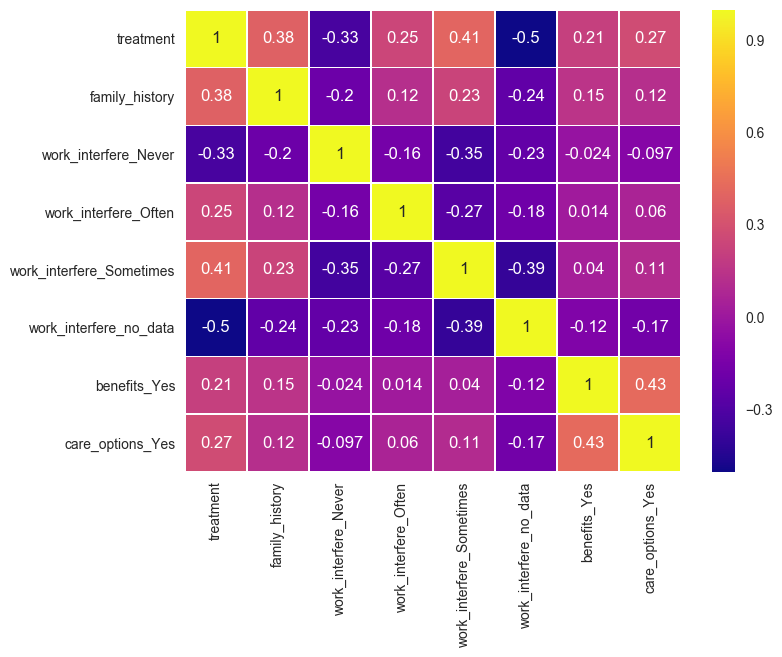

In [30]:
df_data_dummy_cc = pd.get_dummies(df_data_c).corr()
df_data_dummy_cc_sort = df_data_dummy_cc[["treatment"]].sort_values(by=["treatment"], ascending=False);

# 相関係数が0.2以上, -0.2以下の値を取得する
target_cc_value = 0.2

print("正の相関")
display(df_data_dummy_cc_sort[df_data_dummy_cc_sort["treatment"] >= target_cc_value])
print("負の相関")
display(df_data_dummy_cc_sort[df_data_dummy_cc_sort["treatment"] <= (-1*target_cc_value)])


print("相関係数が0.2以上と-0.2以下の項目を表示")
df_indexs = df_data_dummy_cc[(df_data_dummy_cc["treatment"] >= target_cc_value) | (df_data_dummy_cc["treatment"] <= (-1 * target_cc_value))].index
df_cc_target = df_data_dummy_cc.loc[df_indexs, df_indexs]
plt.figure(figsize=(8, 6)) #heatmap size
sns.heatmap(df_cc_target, annot=True, cmap='plasma', linewidths=.5)
plt.show()

相関係数をみると、work_interfereやfamily_history、care_optionsやbenefitsの値が相関係数が高いことが分かる。

- 7項目
    - family_history
    - care_options_Yes
    - benefits_Yes
    - work_interfere_Sometimes
    - work_interfere_Often
    - work_interfere_Never
    - work_interfere_no_data


## 6.2 AICの低い組み合わせを求める

上記で求めた相関係数を元にAICが一番低い組み合わせを算出する

In [31]:
df_data_2 = df_data_c[df_indexs]

### 並列実行のための準備
import itertools #組み合わせを求めるときに使う
import statsmodels.api as sm #線形回帰分析と同時にAICを計算してくれる

# 並列で実施するには並列実行対象のものを配列で渡す必要がある。
# そのため、検索したい組み合わせのリストを配列にして並列処理に渡すことにする
count = 1
combination_all = []

for i in range(len(df_data_2)):
    combi = itertools.combinations(df_data_2.drop("treatment",axis=1).columns, i+1) #組み合わせを求める

    for v in combi:
        y = df_data_2["treatment"]
        X = sm.add_constant(df_data_2[list(v)])
        model = sm.OLS(y, X).fit()
        if count == 1:
            min_aic = model.aic
            min_var = list(v)
        if min_aic > model.aic:
            min_aic = model.aic
            min_var = list(v)
        count += 1
#        print("AIC:",round(model.aic), "変数:",list(v))
        combination_all.append({'aic': round(model.aic), 'values': list(v)})

        
data_result = pd.DataFrame(combination_all);
data_min_aic = data_result.sort_values(["aic"]).head(1)
print("====minimam AIC====")
display(data_min_aic["aic"])
print("====minimam Values====")
display(data_min_aic["values"].values)

====minimam AIC====


126    940.0
Name: aic, dtype: float64

====minimam Values====


array([ list(['family_history', 'work_interfere_Never', 'work_interfere_Often', 'work_interfere_Sometimes', 'work_interfere_no_data', 'benefits_Yes', 'care_options_Yes'])], dtype=object)

- 7項目
    - family_history
    - care_options_Yes
    - benefits_Yes
    - work_interfere_Sometimes
    - work_interfere_Often
    - work_interfere_Never
    - work_interfere_no_data


## 6.3 ステップワイズ法でAICの組み合わせを求める

ステップワイズ法を用いて全組み合わせAICの計算を実施してみる。

In [195]:
import pyper #pyperとRを事前にインストールしておく必要がある
r = pyper.R(use_pandas='True')
r.assign('df_data_c', df_data_c)# Rへデータ渡す
print(r("step(lm(treatment~.,data=df_data_c))")) # Rのコマンド実行


 実行が停止されました 



41種類の変数が選択されたがこれはどうなんだろうか...
一旦保留...

## 6.4 多重共線性のチェック

6.2で求めた説明変数の候補で多重共線性のチェックを実施し、多重共線性が無いことを確認する。


In [32]:
from sklearn.linear_model import LinearRegression
print("説明変数の候補")
display(set(df_indexs))

print("VIFの計算")
df = df_data_c[df_indexs].drop(["treatment"],axis=1)
for cname in df.columns:  
    y=df[cname]
    X=df.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    print(cname,":" ,1/(1-np.power(rsquared,2)))
    

説明変数の候補


{'benefits_Yes',
 'care_options_Yes',
 'family_history',
 'treatment',
 'work_interfere_Never',
 'work_interfere_Often',
 'work_interfere_Sometimes',
 'work_interfere_no_data'}

VIFの計算
family_history : 1.02012274138
work_interfere_Never : 1.30608479513
work_interfere_Often : 1.1715344745
work_interfere_Sometimes : 1.48636117871
work_interfere_no_data : 1.3894756467
benefits_Yes : 1.04072519313
care_options_Yes : 1.04712341657


## 6.5 重回帰分析を実施する

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

#X_train = X
#y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

訓練のデータに対する識別率：59.69%

MSE=0.175
RMSE=0.418
MAE=0.175


予測,1,0
実際,,
1,577,56
0,163,458


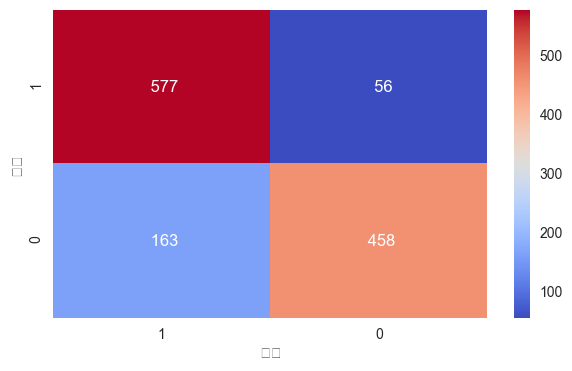

正解率：82.54%
再現率：91.15%
適合率：77.97%
F1：84.05%


In [34]:
# 最適パラメータを用いて識別する
clf2 = LinearRegression(fit_intercept=True)
clf2.fit(X_train, y_train)

score = clf2.score(X_train, y_train) * 100
print('訓練のデータに対する識別率：{0:.2f}%'.format(score))
print()

model = LinearRegression(fit_intercept=True)
model, df_result = crossValidation(model, X, y)

# 評価指標の算出
y_test = df_result["y_test"]
y_pred = df_result["y_pred"]

def xxx(value):
    if value >= 0.5:
        value = 1
    else:
        value = 0
    return value
    
y_pred = list(map(xxx, y_pred))

result_m = showMSEandRMESandMAE(y_test, y_pred)

result_c = showConfusionMatrix(y_test, y_pred)

summary['LinearRegression'] = setSummary(score, result_m, result_c)

# 7. SVM(SVC)

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

#X_train = X
#y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# SVMは標準化が必要
stdsc = StandardScaler()
# 標準化を行うにあたり、int型だと警告エラーが出ていたので、float64型にキャストする
#X_train = X_train.astype("float64")
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

/Users/megadreams14/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 7.1 GridSearchによる最適なパラメータの検討

In [36]:
%%time
#parameters = {'kernel':('linear', 'rbf'), 'C':[5, 10], 'gamma': [1, 2]} # ここを編集する
parameters = {
    'kernel':('linear', 'rbf'),
    'C':[5, 10],
#    'gamma': [1, 2, 5]
} # ここを編集する
model = SVC()

clf_svm = GridSearchCV(model, parameters, cv=10)
clf_svm.fit(X_train, y_train)
print(clf_svm.best_params_, clf_svm.best_score_)

{'C': 10, 'kernel': 'linear'} 0.811858608894
CPU times: user 49.5 s, sys: 226 ms, total: 49.7 s
Wall time: 50.3 s


In [39]:
# 最適パラメータを用いて訓練データの識別率を求めてみる
clf_svm_tmp = SVC(**clf_svm.best_params_)
clf_svm_tmp.fit(X_train, y_train)

score = clf_svm_tmp.score(X_train, y_train) * 100
print('訓練のデータに対する識別率：{0:.2f}%'.format(score))

訓練のデータに対する識別率：88.03%


## 7.2 交差検証と評価

グリッドサーチで算出したパラメータを利用して交差検証を実施する。

MSE=0.171
RMSE=0.414
MAE=0.171


予測,1,0
実際,,
1,569,64
0,151,470


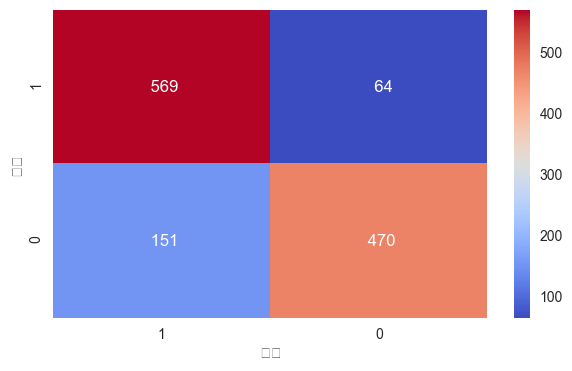

正解率：82.85%
再現率：89.89%
適合率：79.03%
F1：84.11%


In [40]:
model = SVC(**clf_svm.best_params_)
model, df_result = crossValidation(model, X, y)

# 評価指標の算出
y_test = df_result["y_test"]
y_pred = df_result["y_pred"]

result_m = showMSEandRMESandMAE(y_test, y_pred)

result_c = showConfusionMatrix(y_test, y_pred)

summary['SVM'] = setSummary(score, result_m, result_c)


# 8. 決定木(DecisionTreeClassifier)

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV

# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

#X_train = X
#y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 8.1 GridSearchによる最適なパラメータの検討

決定木で設定可能な最適なパラメータをグリッドサーチを利用して検索する

In [43]:
%%time
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    # 不純度の評価方法
    ## gini : ジニ係数、 entropy : 情報量
    "criterion": ["gini", "entropy"],
    # サンプルを枝に分割する数の際の枝の数の最小値
        "min_samples_split": [2, 3, 5],
    # 1つのサンプルが属する葉の数の最小値
#    "min_samples_leaf": [1, 2, 3, 5, 10, 15],
 #   "max_depth": [None, 3, 5, 10],
}

clf_dtc = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
                param_grid = params,   
                scoring="accuracy", 
                cv = 5,
                n_jobs = -1)
clf_dtc.fit(X, y)

print(clf_dtc.best_params_, clf_dtc.best_score_)

{'criterion': 'gini', 'min_samples_split': 3} 0.75518341307815
CPU times: user 160 ms, sys: 48.7 ms, total: 209 ms
Wall time: 436 ms


In [44]:
# 最適パラメータを用いて識別する
clf_dtc_tmp = DecisionTreeClassifier(**clf_dtc.best_params_)
clf_dtc_tmp.fit(X_train, y_train)

score = clf_dtc_tmp.score(X_train, y_train) * 100
print('訓練のデータに対する識別率：{0:.2f}%'.format(score))

訓練のデータに対する識別率：98.97%


## 8.2 交差検証と検証

グリッドサーチで算出したパラメータを利用して交差検証を実施する。


MSE=0.252
RMSE=0.502
MAE=0.252


予測,1,0
実際,,
1,472,161
0,155,466


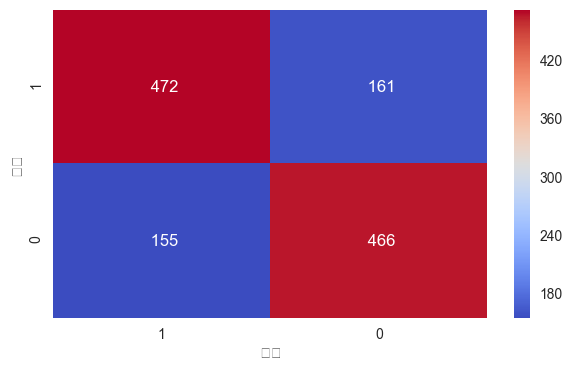

正解率：74.80%
再現率：74.57%
適合率：75.28%
F1：74.92%


In [45]:
model = DecisionTreeClassifier(**clf_dtc.best_params_)
model, df_result = crossValidation(model, X, y)

# 評価指標の算出
y_test = df_result["y_test"]
y_pred = df_result["y_pred"]

result_m = showMSEandRMESandMAE(y_test, y_pred)

result_c = showConfusionMatrix(y_test, y_pred)

summary['DecisionTree'] = setSummary(score, result_m, result_c)

## 8.3 各説明変数の重要度を確認

各説明変数の重要度を確認


,
work_interfere_no_data,0.268577
work_interfere_Never,0.212513
mapAge,0.031179
Age,0.030090
family_history,0.023274


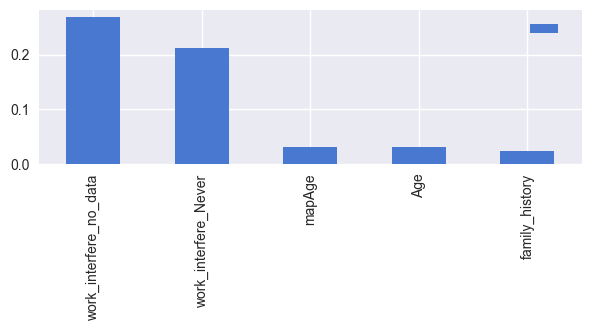

In [46]:
print("各説明変数の重要度を確認")
#print(clf.feature_importances_)

df_result_score = pd.DataFrame(model.feature_importances_, index=X_columns, columns=[""])
df_sort = df_result_score.sort_values(by=[""], ascending=False).head()
display(df_sort)
df_sort.plot.bar(figsize=(7,2))
plt.show()

上記より、全てのデータセットを対象にした場合、
主に下記の説明変数が重要な模様

- work_interfere_no-data
- work_interfere_Never	
- family_history
- care_options_Yes
- work_interfere_Rarely

これは、「<a href="6.1-各説明変数の相関係数を求める">6.1 各説明変数の相関係数を求める</a>」で求めた変数とほぼ同じである。
（work_interfere_Rarely だけ新しく選択されている）

## 8.4 決定木の描画


In [47]:
from sklearn.tree import export_graphviz

# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(model, out_file=dot_data,  
                     feature_names=X_columns,  
                     class_names=["No","Yes"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# 9. ランダムフォレスト(RandomForestClassifier)

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

#X_train = X
#y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 9.1 GridSearchによる最適なパラメータの検討

ランダムフォレストで設定可能な最適なパラメータをグリッドサーチを利用して検索する

In [71]:
%%time
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    # 作成する決定木の数
    "n_estimators":[10, 50, 100, 200],
    # 不純度の評価方法
    ## gini : ジニ係数、 entropy : 情報量
    "criterion": ["gini", "entropy"],
    # サンプルを枝に分割する数の際の枝の数の最小値
    "min_samples_split": [2, 3, 5],
    # 1つのサンプルが属する葉の数の最小値
#    "min_samples_leaf": [1, 2, 3, 5, 10, 15],
    # 深さ
#    "max_depth": [3, 5]
}

clf_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                param_grid = params,   
                scoring="accuracy", 
                cv=10,
                n_jobs = -1)
clf_rfc.fit(X, y)

print(clf_rfc.best_estimator_, clf_rfc.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) {'criterion': 'entropy', 'min_samples_split': 3, 'n_estimators': 200}
CPU times: user 1.96 s, sys: 129 ms, total: 2.09 s
Wall time: 51.2 s


In [74]:
# 最適パラメータを用いて識別する
clf_rfc_tmp = RandomForestClassifier(**clf_rfc.best_params_)
clf_rfc_tmp.fit(X_train, y_train)

score = clf_rfc_tmp.score(X_train, y_train) * 100
print('訓練のデータに対する識別率：{0:.2f}%'.format(score))

訓練のデータに対する識別率：99.89%


## 9.2 交差検証と評価

グリッドサーチで算出したパラメータを利用して交差検証を実施する。

MSE=0.164
RMSE=0.405
MAE=0.164


予測,1,0
実際,,
1,577,56
0,150,471


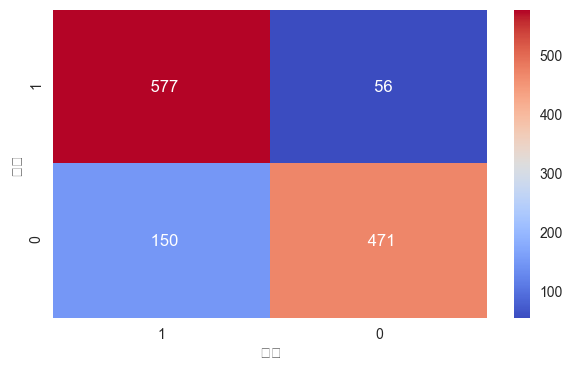

正解率：83.57%
再現率：91.15%
適合率：79.37%
F1：84.85%


In [79]:
model = RandomForestClassifier(**clf_rfc.best_params_)
model, df_result = crossValidation(model, X, y)

# 評価指標の算出
y_test = df_result["y_test"]
y_pred = df_result["y_pred"]

result_m = showMSEandRMESandMAE(y_test, y_pred)

result_c = showConfusionMatrix(y_test, y_pred)

summary['RandomForest'] = setSummary(score, result_m, result_c)

## 9.3 各説明変数の重要度を確認

,
work_interfere_no_data,0.110901
work_interfere_Sometimes,0.072345
family_history,0.052637
work_interfere_Never,0.043168
Age,0.041270


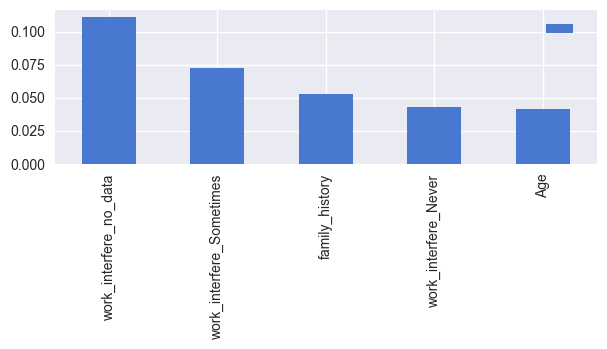

In [80]:
df_result_score = pd.DataFrame(model.feature_importances_, index=X_columns, columns=[""])
df_sort = df_result_score.sort_values(by=[""], ascending=False).head()
display(df_sort)
df_sort.plot.bar(figsize=(7,2))
plt.show()

# 10. アダブースト(AdaBoostClassifier)


In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

#X_train = X
#y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 10.1 GridSearchによる最適なパラメータの検討

アダブーストで設定可能な最適なパラメータをグリッドサーチを利用して検索する

参考)
- [Using GridSearchCV with AdaBoost and DecisionTreeClassifier](https://stackoverflow.com/questions/32210569/using-gridsearchcv-with-adaboost-and-decisiontreeclassifier)

In [82]:
%%time
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    # 不純度の評価方法
    "base_estimator__criterion" : ["gini", "entropy"],
#    "base_estimator__splitter" :   ["best", "random"],
    # 作成する決定木の数
    "n_estimators":[10, 50, 100, 200, 400],
    ## TODO: 以下の値を設定するとエラーになった。詳細は後ほど調べる。
    # サンプルを枝に分割する数の際の枝の数の最小値
#    "min_samples_split": [2, 5, 10, 20, 40],
    # 1つのサンプルが属する葉の数の最小値
#    "min_samples_leaf": [1, 5, 10, 20],
}

#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)
DTC = DecisionTreeClassifier(random_state = 1234)
ABC = AdaBoostClassifier(base_estimator = DTC)
clf_abc    =  GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc', cv=10)
clf_abc.fit(X, y)

print(clf_abc.best_estimator_, clf_rfc.best_params_)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None) {'criterion': 'entropy', 'min_samples_split': 3, 'n_estimators': 200}
CPU times: user 1.54 s, sys: 11.3 ms, total: 1.56 s
Wall time: 1.56 s


上記の結果より

- n_estimators: 200
- criterion: entropy
- min_samples_split: 3
- min_samples_leaf: 1

のパラメータを利用する。

In [84]:
# 最適パラメータを用いて識別する
clf_abc.fit(X_train, y_train)

score = clf_abc.score(X_train, y_train) * 100
print('訓練のデータに対する識別率：{0:.2f}%'.format(score))

訓練のデータに対する識別率：100.00%


## 10.2 交差検証と評価

グリッドサーチで算出したパラメータを利用して交差検証を実施する。

MSE=0.176
RMSE=0.42
MAE=0.176


予測,1,0
実際,,
1,560,73
0,148,473


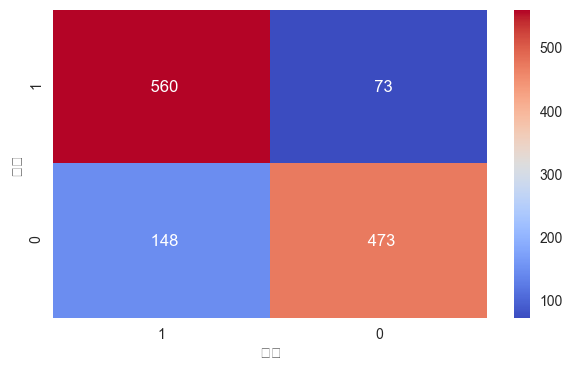

正解率：82.38%
再現率：88.47%
適合率：79.10%
F1：83.52%


In [87]:
# グリッドサーチの結果より
param_n_estimators = 200
param_criterion = "entropy"
param_min_samples_split = 3
param_min_samples_leaf = 1


model = AdaBoostClassifier(
            DecisionTreeClassifier(
#                max_depth = 10,
                min_samples_leaf=param_min_samples_leaf,
                min_samples_split=param_min_samples_split, 
                random_state=1234,
                criterion=param_criterion),
           n_estimators=param_n_estimators,
           random_state=1234,
)

model, df_result = crossValidation(model, X, y)

# 評価指標の算出
y_test = df_result["y_test"]
y_pred = df_result["y_pred"]

result_m = showMSEandRMESandMAE(y_test, y_pred)

result_c = showConfusionMatrix(y_test, y_pred)

summary['AdaBoost'] = setSummary(score, result_m, result_c)

## 10.3 各説明変数の重要度を確認

,
Age,0.104751
family_history,0.036147
work_interfere_Never,0.029209
no_employees_26-100,0.028972
work_interfere_no_data,0.025387


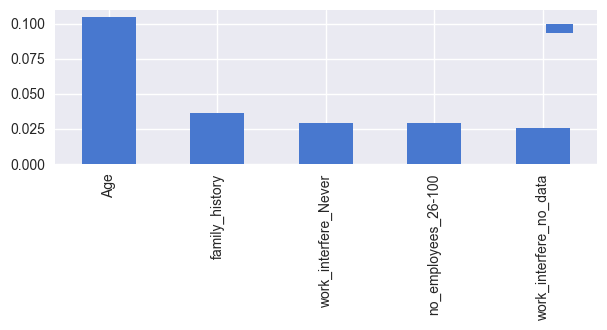

In [88]:
df_result_score = pd.DataFrame(model.feature_importances_, index=X_columns, columns=[""])
df_sort = df_result_score.sort_values(by=[""], ascending=False).head()
display(df_sort)
df_sort.plot.bar(figsize=(7,2))
plt.show()

# 11. TensorFlow+keras

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix

In [90]:
# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# one-hotベクトルに変換
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

## 11.1 パラメータの設定

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

model = Sequential()
# activation: 活性化関数 線形を非線形にするもの
outnum_1=120
model.add(Dense(outnum_1, activation='relu', input_dim=X_train.shape[1]))
outnum_2=100
model.add(Dense(outnum_2, activation='sigmoid', input_dim=outnum_1))
outnum_3=80
model.add(Dense(outnum_3, activation='tanh', input_dim=outnum_2))
#outnum_4=60
#model.add(Dense(outnum_4, activation='sigmoid', input_dim=outnum_3))

# softmax: クラス分類問題の最終そうに持ってくるような関数
model.add(Dense(2, activation='softmax'))#最終層のactivationは変更しないこと

# lr: 学習率
sgd = SGD(lr=0.005, momentum=0.9, nesterov=False)
#rms = RMSprop(lr=0.01)
#adag = Adagrad(lr=0.01)
#adad = Adadelta(lr=0.01)
#adam = Adam(lr=0.01)

# クラス分類問題で最小化するものは、「categorical_crossentropy」
## クラス分類問題: どのクラスに属するのか
### ↑ crossentropyを一番小さくする方法を選択する
## 回帰問題: 誤差がどの程度あるのかという問題になる
### ↑ 誤差を最小化したい => 誤差の二乗和を最小化したい
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy']) # 何を評価するのか: accuracy: 正解率

## 11.2 実行

Train on 877 samples, validate on 377 samples
Epoch 1/100
877/877 [==============================] - 0s 464us/step - loss: 0.7199 - acc: 0.5131 - val_loss: 0.6876 - val_acc: 0.4960
Epoch 2/100
877/877 [==============================] - 0s 116us/step - loss: 0.6961 - acc: 0.5222 - val_loss: 0.6898 - val_acc: 0.4881
Epoch 3/100
877/877 [==============================] - 0s 107us/step - loss: 0.7084 - acc: 0.5074 - val_loss: 0.7191 - val_acc: 0.4881
Epoch 4/100
877/877 [==============================] - 0s 114us/step - loss: 0.6951 - acc: 0.5621 - val_loss: 0.7101 - val_acc: 0.4881
Epoch 5/100
877/877 [==============================] - 0s 121us/step - loss: 0.6981 - acc: 0.5564 - val_loss: 0.6649 - val_acc: 0.6180
Epoch 6/100
877/877 [==============================] - 0s 114us/step - loss: 0.6890 - acc: 0.5359 - val_loss: 0.6599 - val_acc: 0.6499
Epoch 7/100
877/877 [==============================] - 0s 119us/step - loss: 0.6887 - acc: 0.5519 - val_loss: 0.6945 - val_acc: 0.5119
Epoch 8/1

Epoch 61/100
877/877 [==============================] - 0s 115us/step - loss: 0.6171 - acc: 0.6545 - val_loss: 0.5516 - val_acc: 0.7109
Epoch 62/100
877/877 [==============================] - 0s 127us/step - loss: 0.5163 - acc: 0.7480 - val_loss: 0.8432 - val_acc: 0.5517
Epoch 63/100
877/877 [==============================] - 0s 132us/step - loss: 0.5301 - acc: 0.7412 - val_loss: 0.5305 - val_acc: 0.7374
Epoch 64/100
877/877 [==============================] - 0s 110us/step - loss: 0.4604 - acc: 0.7868 - val_loss: 0.3731 - val_acc: 0.8435
Epoch 65/100
877/877 [==============================] - 0s 116us/step - loss: 0.5199 - acc: 0.7423 - val_loss: 0.4237 - val_acc: 0.8143
Epoch 66/100
877/877 [==============================] - 0s 125us/step - loss: 0.4753 - acc: 0.7788 - val_loss: 0.6992 - val_acc: 0.5942
Epoch 67/100
877/877 [==============================] - 0s 124us/step - loss: 0.5719 - acc: 0.7514 - val_loss: 0.4692 - val_acc: 0.7984
Epoch 68/100
877/877 [==========================

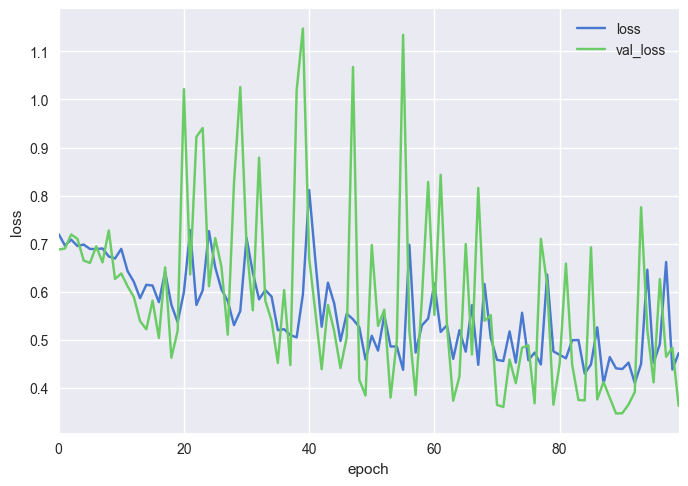

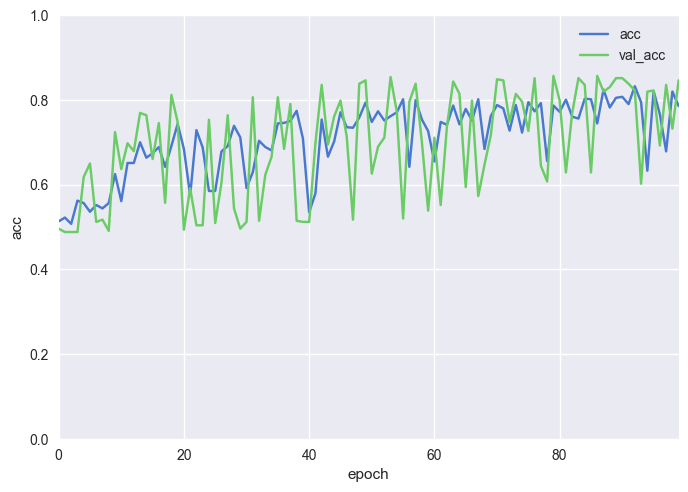

In [92]:
# 計算の実行
## 複雑な問題ほどミニバッチ処理をしたほうが良い(メモリ制限、局所解に陥りにくい)
fit = model.fit(X_train, y_train_onehot,
          epochs=100,
          batch_size=25,validation_data=(X_test, y_test_onehot))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)


# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()


In [95]:
# モデルの保存
model.save('TensorFlow_model.h5')
# 読み込み
#model = load_model('TensorFlow_model.h5')

MSE=0.154
RMSE=0.392
MAE=0.154


予測,1,0
実際,,
1,174,10
0,48,145


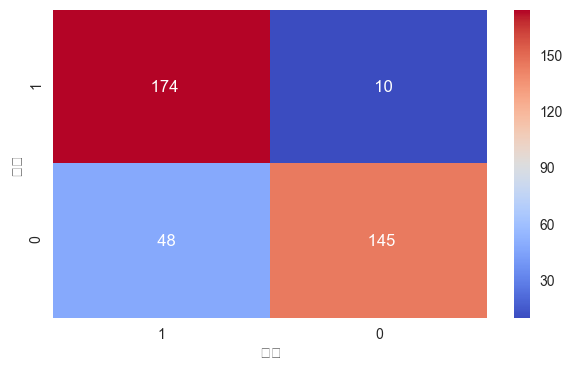

正解率：84.62%
再現率：94.57%
適合率：78.38%
F1：85.71%


In [96]:
# モデルから取得する
y_pred = np.argmax(model.predict(X_test),axis=1)

score=0
result_m = showMSEandRMESandMAE(y_test, y_pred)
result_c = showConfusionMatrix(y_test, y_pred)
summary['TensorFlow'] = setSummary(score, result_m, result_c)

# 12. まとめ

In [97]:
summary_columns = ["accuracy", "recall", "precision", "f1", "MSE", "RMSE", "MAE", "score"]
summary_t = pd.DataFrame(summary).T

df_sort = summary_t[summary_columns].sort_values(by=["accuracy"], ascending=False);
display(df_sort)

,accuracy,recall,precision,f1,MSE,RMSE,MAE,score
TensorFlow,84.615385,94.565217,78.378378,85.714286,0.154,0.392,0.154,0.000000
RandomForest,83.572568,91.153239,79.367263,84.852941,0.164,0.405,0.164,99.885975
SVM,82.854864,89.889415,79.027778,84.109387,0.171,0.414,0.171,88.027366
AdaBoost,82.376396,88.467615,79.096045,83.519761,0.176,0.420,0.176,100.000000
DecisionTree,74.800638,74.565561,75.279107,74.920635,0.252,0.502,0.252,98.973774


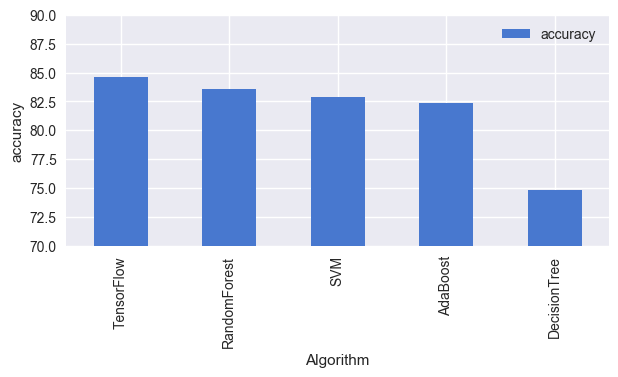

In [101]:
df_sort = df_sort[["accuracy"]]
df_sort.plot.bar(figsize=(7,3))
plt.ylabel("accuracy")
plt.xlabel("Algorithm")
plt.ylim([70.0, 90.0])
plt.show()

# 参考

- 参考にしたNoteBook
   - https://www.kaggle.com/diegocalvo/data-mining-of-mental-health/notebook
      - 国別に表示されている
   - https://www.kaggle.com/kairosart/machine-learning-for-mental-health
      - 性別を男女だけでなく5種類に分離
   - https://www.kaggle.com/kairosart/machine-learning-for-mental-health
      - 評価結果あり、Boosting: 81.75%、R. Forest: 81.22%
   - https://www.kaggle.com/lizpund/analysis-of-mental-health-in-tech-survey-2014
      - 年齢の外れ値を削除ではなく文字列変換(欠損値の分析もされている)
      - timestampをDateTime変換
      - アメリカの州を4つの地区に分離